<a href="https://colab.research.google.com/github/Bookas1468/data-science-google-colab/blob/main/Copy_of_Unit1NotesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1: Python Crash Course

This is a crash course in the basics of python and data manipulation.

Our goal is get vulnerable and exposed to some common ways to manipulate data in python, and learn some practical skills along the way.

We will:

1. Use variables to do basic operations.
2. Explore the built in data structures we'll use: int, float, string, list, and dict
3. Create and Manipulate Numpy Arrays
4. Import and Manipulate Pandas Dataframes (plus cover bools)
5. Use for loops to support Dataframe queries
6. Export Data from Colab

Will this unit cover all the python you'll need to ace this course?

No.

Will this feel like way too much information?

Probably.

But don't worry, you've got this! We'll learn as we go, and as we go you'll see me consisitently type "how to \___ in python" or "how to \___ with pandas" into google. You will learn to do the same.

Let this be Lesson 0: **you don't need to know everything, you just need to know enough to ask for what you need**.


##Arithmetic with ints
Let's start your journey into the world of data science with good ole' fashion addition, subtraction, and mutliplication. Let yourself wonder why I'm saving division for later.

In [ ]:
#Adding in python works inuitively. python automatically prints the result of any operation
3 + 2

5

In [ ]:
#same with subtraction
3 - 2

1

In [ ]:
# multiplication use the astrisk symbol, "*"
3 * 2

6

In [ ]:
# exponetiation is quick too--just use the multiplication symbol twice
3 ** 2

9

This next code block introduces our first built in function, "type". Functions take in an input through parentheses, and then return an output.

In [ ]:
type(3)

int

For example, the absolute value function is "abs" in python, and works exactly like you think it would. Use the dash key "-" in front of a number (int or float) to make it negative

In [ ]:
abs(- 2)

2

I can stores these numbers in a variable for later use.

In [ ]:
# I store "-5" in the variable x
x = -5
# I store "2" in the variable thing
thing = 2

#I print the content of the variables x and thing
x, thing

(-5, 2)

The ```=``` character is how we assign values to a variable. To help you understand this a little better, I'll refer to anther language, R.

In python, we write ```x = -5```. In R, we would write ```x <- -5```. The ```<-``` is supposed to look like an arrow. As in, we are putting the value ```-5``` inside the container named ```x```.

Again, ```=``` is only for assigning variables.

We can update the content of these variables whenever we want.

In [ ]:
# add "-5" to "2" using the variables x and thing
x = x + thing

#print the contents of x
x

-3

Notice that we managed to get our computer to calculate $-5 +2$ without having to write $-5$ or $2$.

What happens if we run the same code block?

In [ ]:
# add the contents x and thing
x = x + thing

#print the contents of x
x

-1

**Task1**:

Explain why the variable x's value is now -1.

You don't have to write your answer within the brackets, just with the cell that says '**Answer1**'

**Answer1**:

you add thing to x again, since x was -3 it goes to -1

Computers are only ever capable of doing exactly what we tell them to do, and its always possible to tell them to do something we don't underestand. This can be a

- feature: a good thing we may or may not have intended to happen.

or a

- bug: a bad thing we didn't want to happen, but are never the less entirely responsible for.

Every piece of code you'll ever write is either a feature, a bug, or confusing. Keep this in mind as we move through the course.

### Division

Let's look at an example of division, the other mathematical operation I left out.

In [ ]:
#use a backslash for division
-4 / 2

-2.0

That number has a decimal; let's check to see if it's still an int.

In [ ]:
type(-4 / 2)

float

### Libraries

To better deal with this new float thing, I'll call a library of functions called numpy, and nickname it np for short.

I need to use numpy for two reasons:

- floats, as we'll see, do not behave as nicely as ints, and need to be treated with care. We'll only ever use libraries that show our floats the proper care and attention they need
- python doesn't really have any built in math functions; abs() is basically the only one.

In [ ]:
import numpy as np

With that our of the way, let's learn why we need to be cautious with floats.

##Floats, and the perils of infinite math with finite computers

We often represent the real numbers, like $\pi$, $\sqrt{2}$, and $\log(0.1)$ using another data type called a float. That's short for floating point number.

Let's play with that last one, $\log(0.1)$. We'll need to call numpy to use a log. Note that ```np.log``` is $\log_e()$ or $\ln()$

In [ ]:
#numpy use log base e. Note how it tells its a float
np.log(0.1)

np.float64(-2.3025850929940455)

You may notice this is a different typw of float from ```-4/2```. This won't matter that much until Unit 9, when our models will get a little more picky about data types.

In [ ]:
#it has a decimal, which in python means its a float--or at least, a type of float
type(np.log(0.1)), type(-4/2)

(numpy.float64, float)

Now for the big reveal: our computers can't actually do math.

At least, not *all* of math. Comupters are reliable mathematically, if we use them well.

Here's an example:

In [ ]:
2000 * np.log(0.1)

np.float64(-4605.170185988091)

This is $2000 \cdot \log(0.1)$, and numpy correctly computed an approximation of that as the decimal number ```-4605.170185988091```.

Math makes some fun statements about logarithms. Specifically, you may remember the rule that:

$2000 \cdot \log(0.1) = \log(0.1^{2000})$

That statement is true--you may have even provided it in a previous class, using the defintions of logarithms, exponentiation, and the field axioms.

But watch what happens when we try this on our computer.

In [ ]:
np.log(0.1**(2000))

/tmp/ipython-input-67815179.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0.1**(2000))


np.float64(-inf)

Python is often known as a great language for debugging, or finding errors; you can see that here, in that Python gives us a RuntimeWarning and complains about dividing by zero, before spitting out its answer: negative infinity (or ```-inf```)

Before explaining why that happens, I will explain a bit about how computers handle numbers.

In order to report a number as an answer, a computer must be able to represent that number--physically. This is a problem, because numbers are infinite, and comupters are very much not.

We can get around this problem for integers with some clever application of mathematical rules.

But for real numbers like $\log(0.1)$, our tricks only take us so far. **Extremely long decimal numbers will break our computer's ability to do math.**

**Task2**:

Assume that $2000 \cdot \log(0.1) = \log(0.1^{2000})$ (or prove it to yourself).

Do

```2000 * np.log(0.1)```

and

```np.log(0.1**(2000))```

give the same output when run in python? **Why not?**

Hint: attempt to write $0.1^{2000}$ all the way out.

**Answer2**:

no, since .1^2000 is so close to 0 that the computer cannot represent it all and deletes it, so you end up attempting to get the log of 0 which is undefined

In [ ]:
2000*np.log(.1)

np.float64(-4605.170185988091)

In [ ]:
np.log(.1**2000)

/tmp/ipython-input-1786167602.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(.1**2000)


np.float64(-inf)

##Strings, Lists, and Dicts
Before we get more into those libraires like numpy, let's return to base python.
Everything in this section can be done without importing a library.

###Strings
Let's start with strings. We can define a string by putting ' ' or " " around any character, including numbers

In [ ]:
'5', type('5'), 5, type(5)

('5', str, 5, int)

In [ ]:
'type(5)', type('type(5)')

('type(5)', str)

We'll use strings to define labels for our models and graphs, and to represent non-numerical data.

For right now though, they are our first example of an iterable data type. In other words, python keeps track of the individual characters in a string, their order, and how many characters there are.

In [ ]:
"dog"

'dog'

In [ ]:
#find the length of an iterable object
len('dog')

3

In [ ]:
#grab the first character in the string 'cat'
'dog'[0]

'd'

Variables are not strings. We'll get an error if we make that mistake

That said, I can assign a string to a variable.

In [ ]:
#assign the string 'dog' to variable x
x = 'dog'
#grab the second and third characters of the string
x[1:3]

'og'

Using the [ ] directly behind an iterable object, or directly behind a varable that points to an iterable object, splices the object according to some built in rules. Let's practice to see how it works.

**Task3**:

Splice the string 'Hippopotomonstrosesquippedaliophobia' to output 'monstro' using a single line of code.

Note: with data science, its not important to get it right on the first try. Just try stuff and see what happens.

In [ ]:
#ANSWER3
'Hippopotomonstrosesquippedaliophobia'[9:16]
#[*write your answer here*]

'monstro'

There's one more thing about strings you must know: strings are immutable, unchangeable. Anytime it looks like you're changing a string, you're actaully creating a new string based off the old, still extant, string.

This means that we, as data scientists, will rarely, if ever, store our data in strings. They're also really hard to look at when they get larger, as Task3 showed.

###Lists

This brings us to our next data type, lists. They are iterable like strings, but they are mutable (changable), and can hold all types of data, not just characters.

In [ ]:
#define my list with brackets
my_list = ["dog", x, 5]
#print my list
my_list

['dog', 'dog', 5]

Notice that when I put a variable in my list, the list reports the contents of the variable. Let's see how that works

In [ ]:
b_list = ['Hippopotomonstrosesquippedaliophobia'[9:16], 4/2 , len(my_list), my_list]

b_list

['monstro', 2.0, 3, ['dog', 'dog', 5]]

In [ ]:
#add another item to the end of my list
my_list.append(np.log(0.1))
#print the list
my_list

['dog', 'dog', 5, np.float64(-2.3025850929940455)]

In [ ]:
b_list

['monstro', 2.0, 3, ['dog', 'dog', 5, np.float64(-2.3025850929940455)]]

**Task4**:

Explain what happened in the last three code blocks; why is 2580156526864974.5 in b_list now?

**Answer4**:

b_list contains my_list and Python lists are not static so changing my_list's content also changes b_list's content

Let's practice splicing once more before moving on.

**Task5**:

Using one line of code, grab the last three entries of my_list without writing my_list anywhere in your code.

This task is a little harder than the others, so make sure you're working together. Don't be shy about googling 'how to splice lists in python' either.

In [ ]:
#ANSWER5

b_list[3][1:4]

['dog', 5, np.float64(-2.3025850929940455)]

###Dicts

Like lists, dicts can hold any and all types of data. What differentiaties them from lists is that data in a dict is stored as a key/value pair called an item.

In [ ]:
#make my dict
my_dict = {'one':4/2, 2:my_list, '3':b_list[0]}
my_dict

{'one': 2.0,
 2: ['dog', 'dog', 5, np.float64(-2.3025850929940455)],
 '3': 'monstro'}

Dicts aren't entirely iterable.

In [ ]:
#my_dict[0]

Instead of splicing, we acces the values of a dict using its keys.

In [ ]:
my_dict['one'], my_dict['3'], my_dict[2.]

(2.0, 'monstro', ['dog', 'dog', 5, np.float64(-2.3025850929940455)])

In [ ]:
#dicts can recognize when floats are equivalent to ints
my_dict[2]

['dog', 'dog', 5, np.float64(-2.3025850929940455)]

If we want to iterate a dict, we need its keys. We can also just grab the values directly

In [ ]:
my_dict.keys()

dict_keys(['one', 2, '3'])

In [ ]:
my_dict.values()

dict_values([2.0, ['dog', 'dog', 5, np.float64(-2.3025850929940455)], 'monstro'])

There are two other basic iterable data types in python: sets and tuples. We don't need to know much about them for this course though, so we'll move on to some data structures that we will use *a lot*.

## Numpy Arrays

Nearly all scientific computing and data science in python uses numpy arrays, or something built out of numpy arrays. Numpy arrays are similar to lists, except they are imutable, and only hold one data type at a time

In [ ]:
first_array = np.array([x,'dog', 'montro'])
first_array

array(['dog', 'dog', 'montro'], dtype='<U6')

In [ ]:
hoo_array = np.array([np.pi, 11, 2 - 7])
hoo_array

array([ 3.14159265, 11.        , -5.        ])

hoo_array converted the two ints, 11 and -5, into floats, to ensure that everything is the same data type.

A similar thing happens when you try to mix floats and ints with strings.

**Task6**:

What happens when you make an numpy array with floats, strings, and ints?

In [ ]:
#ANSWER6
a_ray = np.array([1231.1523124,"cheeze whizz", 123])
a_ray

array(['1231.1523124', 'cheeze whizz', '123'], dtype='<U32')

**Answer6 cont.**:

it converts all the items into strings since it can only have one data type and most data types can be read to and from strings

Why make such a big deal out of numpy arrays, if they have this weird behavior?

Ensuring that arrays are always of the same data type makes operations with arrays fast, which is essential when dealing with even moderately sized data sets.

Actually there's more reasons to love numpy arrays.

Arrays support element wise multiplication, addition, subtraction, and division by constants. Which is just what would happen to vectors, the mathematical object arrays were modeled after.

In [ ]:
2 * hoo_array + 1

array([ 7.28318531, 23.        , -9.        ])

Regular multiplication with arrays executes element wise multiplication

In [ ]:
hoo_array * hoo_array

array([  9.8696044, 121.       ,  25.       ])

Numpy arrays also handle matrix multiplication. What's that? Don't worry about it for now, just know that it exists.

In [ ]:
# define a new array, with easy to follow numbers
pl_array = np.array([1,2,3])

In [ ]:
#inner product, dot product
pl_array @ pl_array

np.int64(14)

In [ ]:
#matmul works as a dot product/ inner product as well
np.matmul(pl_array,pl_array)

np.int64(14)

In [ ]:
#use np.outer for outer product
first_matrix = np.outer(pl_array,pl_array)
first_matrix

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

### Array Creation

One of the great things about computers is that they can do tedious tasks for me, like make a 100 by 100 matrix.

In [ ]:
#feel the power
some_ones = np.ones((100,100))
some_ones

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
#zeros works the same way, except with zeros
np.zeros(3)

array([0., 0., 0.])

Here are examples of other ways to make arrays. You can find even more [here](https://numpy.org/doc/stable/reference/routines.array-creation.html).

In [ ]:
#creates an array of 21 values, evenly spaced from -10 to 10, inclusive
#notice how it always generates floats
np.linspace(-10,10,21)

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [ ]:
#also creates evely spaced values over a specificed range.
#similar to linspace, but less stable, and requires less inputs
#sometimes it generates floats, sometimes it generates ints
x_array = np.arange(10)
x_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#makes an array of 15 4s
np.repeat(4,15)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

**Task7**:

Make an array from 87 to 104 (inclusive) with exactly 50 entries.

In [ ]:
#ANSWER7

np.linspace(87,104,50)

array([ 87.        ,  87.34693878,  87.69387755,  88.04081633,
        88.3877551 ,  88.73469388,  89.08163265,  89.42857143,
        89.7755102 ,  90.12244898,  90.46938776,  90.81632653,
        91.16326531,  91.51020408,  91.85714286,  92.20408163,
        92.55102041,  92.89795918,  93.24489796,  93.59183673,
        93.93877551,  94.28571429,  94.63265306,  94.97959184,
        95.32653061,  95.67346939,  96.02040816,  96.36734694,
        96.71428571,  97.06122449,  97.40816327,  97.75510204,
        98.10204082,  98.44897959,  98.79591837,  99.14285714,
        99.48979592,  99.83673469, 100.18367347, 100.53061224,
       100.87755102, 101.2244898 , 101.57142857, 101.91836735,
       102.26530612, 102.6122449 , 102.95918367, 103.30612245,
       103.65306122, 104.        ])

Splicing works the same for arrays and lists.

**Task8**:

Grab the first through fifth entries of x_array.

In [ ]:
#ANSWER8
x_array[1:6]


array([1, 2, 3, 4, 5])

### Vectorized Operations

Numpy arrays come with many built in methods, many of which are vectorized operations. All you need to know about 'vectorized operations' is that: they are usually much faster than any other option, and how to use them.

There are two examples below. You can see others [here](https://numpy.org/doc/stable/reference/arrays.ndarray.html#array-methods).

In [ ]:
#finds the most positive (largest) value in the array
x_array.max()

np.int64(9)

In [ ]:
#finds the average of the values in x_array
x_array.mean()

np.float64(4.5)

## Pandas Dataframes

These are the data structure we will most often directly manipulate in this class. Paying special attention to this section will make your life easier later.

Like numpy, we need to import pandas, and we often use an abreviation.

In [ ]:
import pandas as pd

We can make a pandas dataframe from any numpy array.

In [ ]:
x_df = pd.DataFrame(x_array)
x_df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


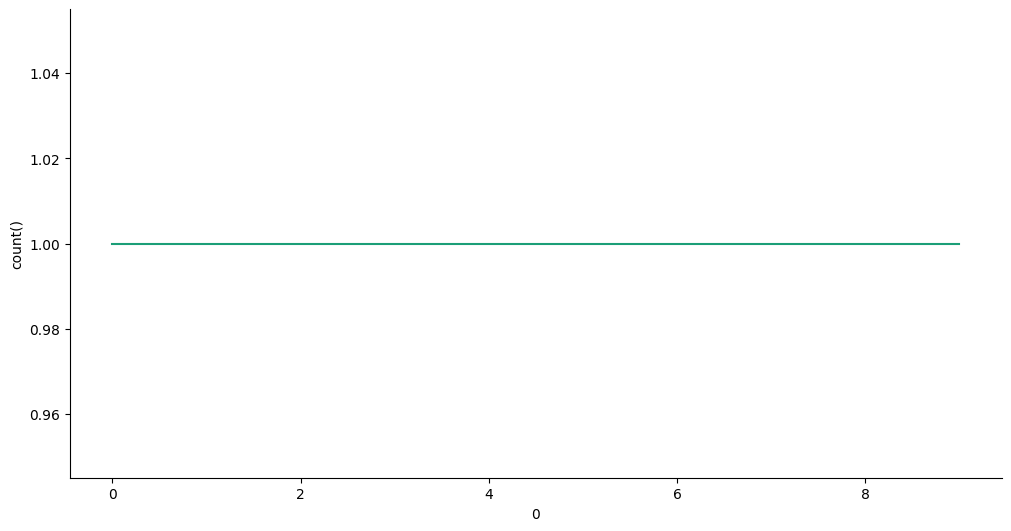

In [ ]:
# @title 0 vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x_df.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

Notice how the one dimensional array was turned into a vertical column. Pandas dataframes frame (ahem) data around columns and column labels. There are row labels too, and these are refered to as indicies.

In [ ]:
some_ones_df = pd.DataFrame(some_ones)
some_ones_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


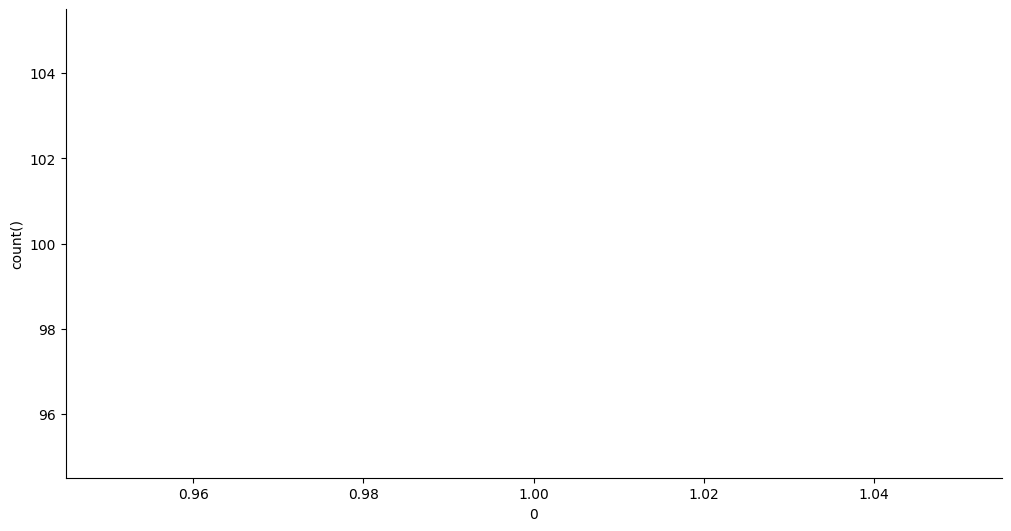

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = some_ones_df.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

Pandas dataframes also have lots of methods, many of them vectorized operations, like numpy. This is because pandas was built on top of numpy.

In [ ]:
#finds the largest value in column 0 of x_df
x_df.max()

,0
0,9


In [ ]:
#sums each row
some_ones_df.sum(axis=0)

,0
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0
...,...
95,100.0
96,100.0
97,100.0
98,100.0


### Slicing Dataframes

For the next part, we're going to need a more interesting example than some_ones_df.

To get a more interesting dataframe, I'm going to pull one from my github using pd.read_csv. This is the most common way you'll get data in this course, but pandas offers more versatile options. You can view them [here](https://pandas.pydata.org/docs/reference/io.html).

In [ ]:
#make a string of the webpage where my data lives
url_basketball = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
#feed that string into the pandas read csv function
basketball = pd.read_csv(url_basketball)

In [ ]:
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


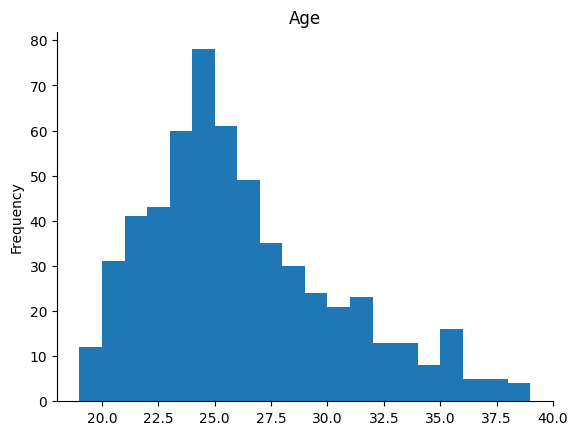

In [ ]:
from matplotlib import pyplot as plt
basketball['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Its easy to call the column names and rows. You can also call the shape, but note that printing the dataframe also tells you the shape.

In [ ]:
basketball.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')

In [ ]:
basketball.index

RangeIndex(start=0, stop=572, step=1)

In [ ]:
basketball.shape

(572, 30)

We call columns by name.

In [ ]:
basketball.Player

,Player
0,Precious Achiuwa
1,Bam Adebayo
2,Ochai Agbaji
3,Santi Aldama
4,Nickeil Alexander-Walker
...,...
567,Thaddeus Young
568,Trae Young
569,Omer Yurtseven
570,Cody Zeller


In [ ]:
basketball['Player']

,Player
0,Precious Achiuwa
1,Bam Adebayo
2,Ochai Agbaji
3,Santi Aldama
4,Nickeil Alexander-Walker
...,...
567,Thaddeus Young
568,Trae Young
569,Omer Yurtseven
570,Cody Zeller


In [ ]:
#the double brackets returns a data frame
basketball[['Player']]

,Player
0,Precious Achiuwa
1,Bam Adebayo
2,Ochai Agbaji
3,Santi Aldama
4,Nickeil Alexander-Walker
...,...
567,Thaddeus Young
568,Trae Young
569,Omer Yurtseven
570,Cody Zeller


The second brackets method is required when we want a column with funky characters in its name.

Want to slice multiple columns?

In [ ]:
basketball[['Player','FG%']]

,Player,FG%
0,Precious Achiuwa,0.501
1,Bam Adebayo,0.521
2,Ochai Agbaji,0.411
3,Santi Aldama,0.435
4,Nickeil Alexander-Walker,0.439
...,...,...
567,Thaddeus Young,0.602
568,Trae Young,0.430
569,Omer Yurtseven,0.538
570,Cody Zeller,0.419


Want to slice multiple rows and multiple columns?

In [ ]:
#use loc to grab the zeroth, second, and 207th row.
basketball[['Player', 'FG%']].loc[[0,4,207]]

,Player,FG%
0,Precious Achiuwa,0.501
4,Nickeil Alexander-Walker,0.439
207,Isaiah Hartenstein,0.644


**Task9**:

Find the names of the Players, feild goal attempts (FGA) and total points (PTS) of the players in the 87th and  94th row.

In [ ]:
#ANSWER9
basketball[['Player','FGA','PTS']].loc[[87,94]]


,Player,FGA,PTS
87,Wendell Carter Jr.,425,603
94,Max Christie,241,284


### Query and Bools

Because I provide clean, moderate to small sized data sets in this course, most of our data wrangling problems can be solved with query.

Query makes use of a built in data type we haven't mentioned yet, called a bool.

I'll give you an example of query, and then I'll define bools.

In [ ]:
#finds all players with more offensive rebounds than defensive rebounds
#and who have also played more than 100 minutes
hustle_players = basketball.query('ORB >= DRB and MP >= 100')
hustle_players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
11,Thanasis Antetokounmpo,PF,31,MIL,34,0,155,16,30,0.533,...,7,6,13,17,7,4,14,24,32,antetth01
164,Luka Garza,C,25,MIN,25,0,122,36,75,0.480,...,19,12,31,4,4,1,6,24,99,garzalu01
191,Mouhamadou Gueye,PF,25,TOR,11,0,120,11,38,0.289,...,12,11,23,5,3,18,12,15,26,gueyemo01
234,Matthew Hurt,PF,23,MEM,8,0,113,12,34,0.353,...,9,7,16,4,3,3,2,8,32,hurtma01
286,Jock Landale,C,28,HOU,56,3,763,106,206,0.515,...,88,84,172,65,20,33,31,74,274,landajo01
295,Maxwell Lewis,SF,21,LAL,34,0,103,4,21,0.190,...,2,2,4,6,2,1,10,5,11,lewisma05
346,Justin Minaya,SF,24,POR,34,1,381,22,74,0.297,...,30,26,56,21,9,10,9,35,61,minayju01
433,Mitchell Robinson,C,25,NYK,31,21,768,73,127,0.575,...,142,121,263,18,37,35,25,55,173,robinmi01
551,Jeenathan Williams,SG,24,HOU,22,0,129,27,50,0.540,...,12,11,23,7,4,1,4,10,63,willije02


Bools are True or False. True is 1, and False is 0. The key words True and False cannot be variables

In [ ]:
#True = 2

SyntaxError: cannot assign to True (ipython-input-210365840.py, line 1)

They come into play when I apply boolean operators. For example, if I want to know if 5 equals 5.

In [ ]:
#does 5 equal 5?
5 == 5

True

In [ ]:
#does 5 equal 'five'?
5 == 'five'

False

True and False are also the numbers 1 and 0 respectively. This can come in handy

In [ ]:
#True equals 1
True == 1

True

In [ ]:
#True not equaling 1 is False
True != 1

False

In [ ]:
#Adding bools counts the number of trues
False + True + True + False + False

2

Here's an example each of *and*, *or*, and *not*.

In [ ]:
#both sides must be true for and
(True == 1) and (False != 0)

False

In [ ]:
#only one side (or more) needs to be true for or
(True == 1) or (False != 0)

True

In [ ]:
#not swaps True for False, and False for True
not 0, not False

(True, True)

Here are the other four boolean operations.

In [ ]:
#strictly less than, and strickly greater than
0 < 0, 4 > 5

(False, False)

In [ ]:
#less than or equal to, and greater than or equal to
5 <= 5, 6 >= 5

(True, True)

Now that you know what bools are, use my example query from above to complete the task below.

**Task10**:

Find all the players that have played more than 41 games (G), and have more turn overs (TOV) than assists (AST).

In [ ]:
#ANSWER10
basketball.query('G>41 and TOV>AST')


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
16,Deandre Ayton,C,25,POR,55,55,1784,427,749,0.570,...,176,433,609,90,56,42,99,109,920,aytonde01
19,Marvin Bagley III,C,24,TOT,50,25,1053,239,408,0.586,...,130,182,312,55,20,33,59,81,583,baglema01
50,Bojan Bogdanović,SF-PF,34,TOT,57,27,1478,309,681,0.454,...,22,130,152,97,30,5,101,95,868,bogdabo02
51,Bol Bol,PF,24,PHO,43,0,469,93,151,0.616,...,32,105,137,17,10,25,19,42,223,bolbo01
55,Chris Boucher,PF,31,TOR,50,0,705,110,217,0.507,...,62,145,207,23,14,24,28,68,322,bouchch01
101,John Collins,PF,26,UTA,68,66,1901,397,746,0.532,...,157,418,575,77,40,61,98,191,1027,collijo01
132,Andre Drummond,C,30,CHI,79,10,1351,267,480,0.556,...,265,443,708,37,73,48,81,140,663,drumman01
175,Rudy Gobert,C,31,MIN,76,76,2593,406,614,0.661,...,285,697,982,102,52,162,118,238,1061,goberru01
210,Jaxson Hayes,C,23,LAL,70,5,877,126,175,0.720,...,69,142,211,33,34,29,43,123,303,hayesja02
242,GG Jackson II,PF,19,MEM,48,18,1233,241,563,0.428,...,53,143,196,59,28,24,65,64,699,jacksgg01


## For loops

Most of the time, there is some [dataframe method](https://pandas.pydata.org/docs/reference/frame.html) that does whatever we want, in terms of data wrangling.

Occasionally, there will be no built in method that quite does what we need.

In those cases, we will use a for loop. For loops often involve if statements, so we'll introduce those as well.

I'll start with a simple example that isn't all that useful.

In [ ]:
for i in range(3):
  print(i)

0
1
2


In [ ]:
#initialize a variable to update during the for loop
x = 0

#initialize an iterable to run our for loop over
onetoten = np.arange(1,11)

#the actual for loop
for i in onetoten:
    x = x + i

In [ ]:
#the sum of the numbers from one to ten
x

np.int64(55)

Most of the time, we'll avoid for loops for anything but plotting, because their are often better vectorized solutions available.

In [ ]:
#could have just used the vectroized solution
onetoten.sum()

np.int64(55)

Here's a more relevant example:

While playing with the 2023/2024 NBA basketball data, I wanted to pull up Lebron James' stats. And I figured I might as well pull all the other players with James in their name, since there couldn't be that many.

I searched for a while, and couldn't find a nice vectorized solution that uses the pandas methods.

So I wrote this for loop. It has too new things from the previous loop:

- a function, enumerate, which allows me to grab the item in my iterable and the index of that item.
- an if statement. They work like this: if the condition in them is met, execute the indented code. If not, then continue with the rest of the for loop.

Most for loops we need in this class will be at least this complicated. Usually more so.

In [ ]:
#create an array of all zeros the same length as one of the columns in basketball
james_index = np.zeros_like(basketball.Player)

#index is the number of the row, name is the string that represents player name
#enumerate is a function that breaks basketball.Player into index and name
for index, name in enumerate(basketball.Player):

    #if the string 'James' is in the string of player name
    if 'James' in name:

        #then put a True value, or 1, in the corresponding James index tracker
        james_index[index] = 1

#adds up the array elements of james_index
#this helps me know if my loop went awry or not
#but otherwise has nothing to do with the for loop.
james_index.sum()

5

In [ ]:
#always a good idea to print out any data set you've created
#even if you're expecting it to be uninteresting
james_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#this grabs all the rows/players with James in their name
basketball.loc[james_index == True]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
56,James Bouknight,SG,23,CHO,14,0,81,18,41,0.439,...,1,8,9,6,1,1,2,3,50,bouknja01
198,James Harden,PG,34,LAC,72,72,2470,352,822,0.428,...,34,335,369,614,77,57,185,127,1192,hardeja01
249,LeBron James,PF,39,LAL,71,71,2504,685,1269,0.540,...,61,457,518,589,89,38,245,78,1822,jamesle01
258,James Johnson,PF,36,IND,9,0,47,3,10,0.300,...,1,3,4,8,5,1,5,9,8,johnsja01
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01


This next task was supposed to require you to make a for loop, but I underestimated how powerful pandas' query function is. So, although my answer key does have a soultion that works, its better to use only query.

Also, to make 'FT%' work in query, write '\`FT%\`' instead.

**Task11**:

Display all players--and their stats-- from the 2023/2024 NBA season, who are PG (point guards), have a 0.9 FG% (free throw percentage) or higher,  and have more than 40 FTA (free throw attempts).

In [ ]:
#ANSWER11
#basketball.query('Pos == "PG" and `FT%`>=.9 and FTA>40')

#ANSWER11

#create an array of all zeros the same length as one of the columns in basketball
gudPGFT_index = np.zeros_like(basketball.Player)

#index is the number of the row, name is the string that represents position
#enumerate is a function that breaks basketball.Pos into index and name
for index, position in enumerate(basketball.Pos):

    #if the string 'PG' is in the string of player position
    if 'PG' in position and basketball.loc[index].Pos == "PG" and basketball.loc[index].F >=  .9 and basketball.loc[index].FTA>40 :

        #then put a True value, or 1, in the corresponding index tracker
        gudPGFT_index[index] = 1

#adds up the array elements
#this helps me know if my loop went awry or not
gudPGFT = basketball.loc[gudPGFT_index == 1]
gudPGFT

AttributeError: 'Series' object has no attribute 'F'

## Exporting Data from Colab

I don't plan on making you do this as part of the course, but this is still a skill I want you to have.

As usual, I'm only covering a tiny bit of what's available. For more info, see: [Importing/Exporting files using pandas](https://pandas.pydata.org/docs/reference/io.html)

Let's say I have a colleague for who doesn't know how to code and will not ever learn how, but they still need the data I've manipulated/generated in order to do their job.

In this case, the path of least resistance is to export the data from Colab to my local machine, and then put it in a shared cloud folder (like google drive) and/or send it to them in an email.

Let's practice this with the James data, shown below.

In [ ]:
james_df = basketball.loc[james_index == True]
james_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
56,James Bouknight,SG,23,CHO,14,0,81,18,41,0.439,...,1,8,9,6,1,1,2,3,50,bouknja01
198,James Harden,PG,34,LAC,72,72,2470,352,822,0.428,...,34,335,369,614,77,57,185,127,1192,hardeja01
249,LeBron James,PF,39,LAL,71,71,2504,685,1269,0.540,...,61,457,518,589,89,38,245,78,1822,jamesle01
258,James Johnson,PF,36,IND,9,0,47,3,10,0.300,...,1,3,4,8,5,1,5,9,8,johnsja01
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01


Here's how I can turn this into a csv, a format most programs (like excel) can read:

In [ ]:
#creates a csv file on whatver machine the code is run on.
#I need to name the file as well.
james_df.to_csv('NBA_Jameses.csv')

Next steps:

1. Look at the side panel--to the left of all the code and text blocks.

2. Click on the icon that looks like a tiny manilla folder.

3. Find NBA_Jameses.csv, hover your mouse over it, and click on the three stacked dots to the right of it.

4. Click download.

From there, its the same as downloading any file from the internet onto your computer.

While you're there, notice that you can upload files to the google server where all your code is being run, and even mount your google drive account.

## Further Reading

As promised, there is much I didn't cover. Here's lip service to some of that left out information.



### Tensors and xarrays

Notable datastructures I didn't cover, but that are relevant for modern machcine learning: tensors, and xarrays.

Tensors are multi dimensional arrays; technically numpy can make them, but tensorflow and Pytorch are two libraries that implement tensors more optimized for statistical learning.

xarray is its own python library, and it's basically what would happen if a dataframe and a dict had the perfect child.

We use tensors for doing math with high dimensional data, and we use xarrays to keeping track of a lot of seperate, but related, datasets.

We won't use tensors unless we get to neural networks, but we'll use xarrays all the time. We'll discuss them more as they come up.


### Polars

You may have noticed that query is slow. In fact pandas itself--while way faster than using lists--is quite slow.

There is a relatively new library called [polars](https://pola.rs/) that does everything pandas does, but much faster.

The only reason I will use pandas in my examples is because I was too lazy to learn a new thing.

### Data Wrangling

Data Wrangling is what happens when the data you're interested in is not a csv . That's a bit of a joke and an exaggeration . . . but its also not.

When I say csv, I mean nice, neat rows and columns, with everything lined up and seperated by commas.

Here are a few ways real world data can make us suffer:
- it's not collected in rows and columns
- it's collected in rows and columns, but so disorganized that the rows and columns don't actually mean anything.
- it's collected in neat rows and columns, but the the entries into those rows and columns are inconsistent in format.
- everything is in rows and columns, neat and consistent throughout--but our functions are still reading the data wrong (this happened to me with a csv file that wasn't actually seperated by commas, but by semi colons instead).
- like the last point, except everything was read correctly, but now there are missing values.
- any combination of the above.

Even if everything is actually perfect--which does happen--data sets can be so large that doing anything with them at all is a chore.

For class notes and exercises, I've limited my examples to perfectly clean, small to medium sized data.

Projects, however, are open ended, and you will choose your your own data. So up to you if you want to choose a pre-cleaned data set or not.

## Summary

We covered quite a bit in our first unit.

We:

- learned the two main ways python deals with numbers, ints and floats
- covered strings, lists, and dicts, which we can use to store multiple pieces of data linked together.
- introduced the numpy array, the most common way to mathematically operate on collections of data of the same type in python
- manipulated real world tabular data using pandas
- learned how to import and export data from pandas.

I expect most of y'all to feel overwhelmed and confused, especially if this is your first coding class. That's good! It means you're thinking about this material.

Remember, I'm not asking or expecting you to become an expert data scientist. Our goal is to get vulnearble and expose ourselves to how data science/modern statistics is done. Feel good if you've done that!